In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm.auto import tqdm

2024-02-17 13:01:57.790257: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-17 13:01:57.816557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 13:01:57.816586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 13:01:57.817268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 13:01:57.821580: I tensorflow/core/platform/cpu_feature_guar

In [20]:
def make_model(learning_rate=0.002, momentum=0.8, loss='binary_crossentropy') -> keras.Model:
    input = keras.Input(shape=(150,150, 3))
    conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input)
    pooling = keras.layers.MaxPooling2D(pool_size=(2,2))(conv)

    flatten = keras.layers.Flatten()(pooling)

    inner_dense = keras.layers.Dense(64, activation='relu')(flatten)
    output = keras.layers.Dense(1, activation='sigmoid')(inner_dense)

    model = keras.Model(input, output)

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

    return model

In [11]:
m = make_model()
m.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 180000)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                11520064  
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                           

In [15]:
x = np.array([float(i) for i in range(150*150*32)])
x = np.reshape(x, newshape=[1, 150, 150, 32])
conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3), padding='same')(x)
max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2,2))(conv)

flatten = keras.layers.Flatten()(max_pool_2d)

dense1 = keras.layers.Dense(64, activation='relu')(flatten)
dense2 = keras.layers.Dense(1, activation='sigmoid')(dense1)


conv.shape, max_pool_2d.shape, flatten.shape, dense1.shape, dense2.shape

(TensorShape([1, 150, 150, 32]),
 TensorShape([1, 75, 75, 32]),
 TensorShape([1, 180000]),
 TensorShape([1, 64]),
 TensorShape([1, 1]))

### Question 1

##### Since we have a binary classification problem, what is the best loss function for us?
* mean squared error
* `binary crossentropy`
* categorical crossentropy
* cosine similarity

### Question 2

##### What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

* 1
* 65
* `896`
* 11214912

### Question 3

In [53]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory("data/train/", 
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         class_mode='binary')

test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory("data/test/", 
                                         target_size=(150, 150), 
                                         batch_size=20, 
                                         class_mode='binary',
                                         shuffle=False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [54]:
model = make_model()
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 16s 86ms/step - loss: 0.6682 - acc: 0.5844 - val_loss: 0.6263 - val_acc: 0.6503
Epoch 2/10
184/184 [==============================] - 16s 85ms/step - loss: 0.6115 - acc: 0.6682 - val_loss: 0.5741 - val_acc: 0.7102
Epoch 3/10
184/184 [==============================] - 16s 85ms/step - loss: 0.5714 - acc: 0.7030 - val_loss: 0.5439 - val_acc: 0.7190
Epoch 4/10
184/184 [==============================] - 16s 85ms/step - loss: 0.5294 - acc: 0.7482 - val_loss: 0.5269 - val_acc: 0.7255
Epoch 5/10
184/184 [==============================] - 16s 86ms/step - loss: 0.5030 - acc: 0.7642 - val_loss: 0.5213 - val_acc: 0.7669
Epoch 6/10
184/184 [==============================] - 16s 86ms/step - loss: 0.4785 - acc: 0.7797 - val_loss: 0.5161 - val_acc: 0.7669
Epoch 7/10
184/184 [==============================] - 16s 84ms/step - loss: 0.4515 - acc: 0.8069 - val_loss: 0.4993 - val_acc: 0.7560
Epoch 8/10
184/184 [==============================] - 16s 87ms

<Axes: title={'center': 'Loss'}>

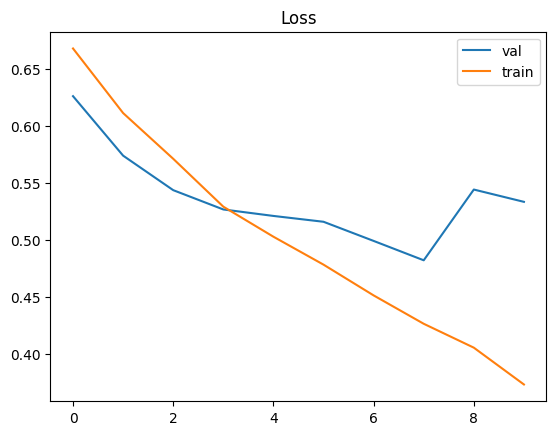

In [55]:
plt.title("Loss")
sns.lineplot(history.history['val_loss'], label="val")
sns.lineplot(history.history['loss'], label="train")

<Axes: title={'center': 'Accuracy'}>

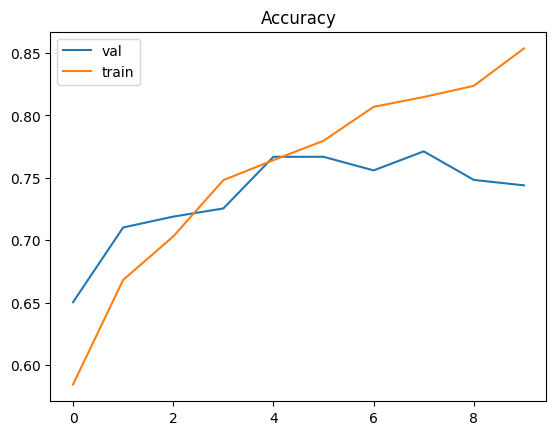

In [56]:
plt.title("Accuracy")
sns.lineplot(history.history['val_acc'], label="val")
sns.lineplot(history.history['acc'], label="train")

In [57]:
round(np.median(history.history['acc']), 1)

0.8

##### What is the median of training accuracy for all the epochs for this model?


* 0.20
* 0.40
* 0.60
* `0.80`

### Question 4

In [58]:
round(np.std(history.history['loss']), 4)

0.0893

##### What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* `0.091`
* 0.131

## Data Augmentation

In [59]:
train_gen_2 = ImageDataGenerator(rescale=1./255,
                               rotation_range=50, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
train_ds_2 = train_gen_2.flow_from_directory("data/train/", 
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         class_mode='binary')

test_gen_2 = ImageDataGenerator(rescale=1./255)
test_ds_2 = test_gen_2.flow_from_directory("data/test/", 
                                         target_size=(150, 150), 
                                         batch_size=20, 
                                         class_mode='binary',
                                         shuffle=False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [60]:
history_2 = model.fit(train_ds_2, epochs=10, validation_data=test_ds_2)

Epoch 1/10
184/184 [==============================] - 25s 135ms/step - loss: 0.4941 - acc: 0.7683 - val_loss: 0.4887 - val_acc: 0.7625
Epoch 2/10
184/184 [==============================] - 25s 138ms/step - loss: 0.4879 - acc: 0.7694 - val_loss: 0.4720 - val_acc: 0.7767
Epoch 3/10
184/184 [==============================] - 25s 138ms/step - loss: 0.4821 - acc: 0.7713 - val_loss: 0.4627 - val_acc: 0.7843
Epoch 4/10
184/184 [==============================] - 25s 135ms/step - loss: 0.4712 - acc: 0.7838 - val_loss: 0.4540 - val_acc: 0.7930
Epoch 5/10
184/184 [==============================] - 25s 136ms/step - loss: 0.4672 - acc: 0.7900 - val_loss: 0.4614 - val_acc: 0.7952
Epoch 6/10
184/184 [==============================] - 25s 137ms/step - loss: 0.4651 - acc: 0.7838 - val_loss: 0.5588 - val_acc: 0.7386
Epoch 7/10
184/184 [==============================] - 25s 136ms/step - loss: 0.4651 - acc: 0.7884 - val_loss: 0.4855 - val_acc: 0.7876
Epoch 8/10
184/184 [==============================] - 2

<Axes: title={'center': 'Accuracy'}>

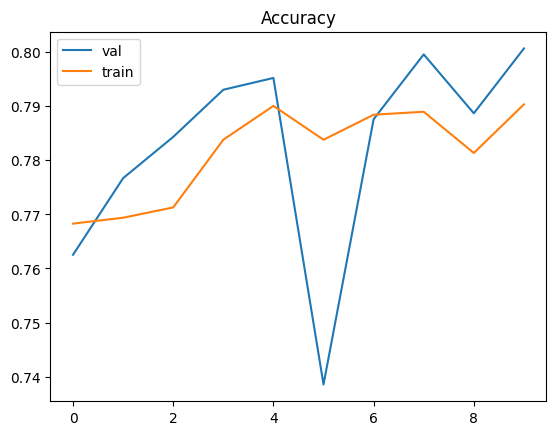

In [67]:
plt.title("Accuracy")
sns.lineplot(history_2.history['val_acc'], label="val")
sns.lineplot(history_2.history['acc'], label="train")

<Axes: title={'center': 'Combined accuracy'}>

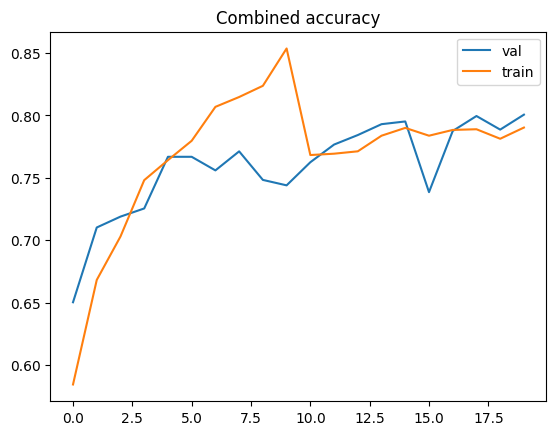

In [69]:
plt.title("Combined accuracy")
sns.lineplot(history.history['val_acc'] + history_2.history['val_acc'], label="val")
sns.lineplot(history.history['acc'] + history_2.history['acc'], label="train")

In [64]:
round(np.mean(history_2.history['val_loss']), 3)

0.472

##### Question 5: What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* `0.48`
* 0.78
* 0.108

In [66]:
round(np.average(history_2.history['val_acc'][-5:]), 2)

0.78

##### Question 6: What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

* 0.38
* 0.58
* `0.78`
* 0.98